# **The Colour Language Game**

Programming with Data AE2

# Abstract

The methods section of this notebook includes a range of functions for analysing datasets with pandas, such as calculating the Euclidean distance between two arrays. In the Results section I use these functions to create a program called Bob which simulates the collective intelligence of a player playing a Colour Language Game. Bob uses the functions established in methods to analysis these datasets and present the findings in a performance report that includes visualisations. Finally in the conclusions section, I discuss the ethical ramifications of this analysis and the potential unintended consequences of poor use.

#### Keywords:

Language-learning, colours, python, pandas, numpy

# Introduction

This Python Notebook aims to analyse a dataset from an online experiment that consists of thousands of colour naming responses mapped to RGB triplets by thousands of participants against the X11 reference dataset. The first dataset is being used to simualate the responses of players of a Colour Naming Game, in which a fictional character called Alice asks the players to identify the corresponding RGB values for a given English colour term. This notebook tests the game by building a synthetic player with collective intelligence, called Bob, which uses and performing analysis on the colour naming dataset.

# Methods

## Required Modules:

In [1]:
import io, time, os, string, pandas as pd, numpy as np, matplotlib.pyplot as plt
from nbformat import current
from PIL import Image

C:\Users\Isobel\anaconda3\lib\site-packages\nbformat\current.py:15: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  warnings.warn("""nbformat.current is deprecated.


In [2]:
pd.set_option("display.max_rows", None, "display.max_columns", None) 
pd.set_option("display.max_rows", 9, "display.max_columns", None)

## Required Functions:

The following function prepares the raw data for analysis by making consistent the case of all letters and removing punctuations marks and unnecessary white spaces. It takes the name of the data-frame that you wish to clean and the name of the column within that data-frame as parameters. The function must be applied to each column of the data-frame individually. The return value is a copy of the original data-frame with the column cleaned.  

In [3]:
def clean_df(df, column_name):
    """Standardise the format of a column in a DataFrame."""
    # remove all spaces
    df[column_name] = df[column_name].str.replace(" ", "")
    # remove all punctuation
    translator = str.maketrans('', '', string.punctuation)
    df[column_name] = df[column_name].str.lower().str.translate(translator).str.strip()
    return df

I have chosen to remove all spaces so that the hyphen character does not need to be replaced with a white space but the words remain consistent with each other. I have also opted not to remove numbers from the dataset. Thus, for example, I treat 'grey' and 'grey42' as distinct shades of grey which qualify as different colours.

The following function takes the names of the two arrays as parameters, calculates the euclidean distance between the two arrays and returns the euclidean distance in the form of a float.

In [4]:
def euclidist3D (ary1, ary2):
    """Measure the Euclidean distance between two arrays."""
    distance = np.sqrt(np.square(ary1[0] - ary2[0]) 
                 + np.square(ary1[1] - ary2[1]) 
                 + np.square(ary1[2] - ary2[2]))
    return distance

The following function loads a csv file using pandas. It takes the csv file as its parameter and returns the corresponding dataframe.

In [5]:
def load_data(filename):
    """Load csv file."""
    return pd.read_csv(filename)

The following function computes the average RGB value for a specified list of colour term in the colour naming dataset. It takes the name of the dataframe, the list of colour terms that you would like the average RGB value to be calculated for and the column name (which, here, is `colour_name`) as parameters. It then returns a dataset where each colour name in the dataset is unique and has an averaged RGB value.

In [6]:
def compute_avgs(df, colours, column_name='colour_name'):
    """Compute the average RGB value."""
    avg_df = df[df[column_name].isin(colours)].groupby(column_name)[['R', 'G', 'B']].mean()
    return avg_df

The following function loads and cleans the rgb_x11.csv reference file. It takes the filename as the parameter and returns the corresponding cleaned dataframe.

In [7]:
def load_x11_colours(filename):
    """Used to load and clean rgb_x11.csv"""
    df = pd.read_csv(filename, sep=",", header=None, names=['R','G','B','names'], skiprows=1)
    # cleans the dataframe according to the clean_df function
    df = clean_df(df, 'names')
    # removes duplicates by RGB value. 
    df = df.drop_duplicates(['R','G','B'])
    # setting the names to be the index so we can index quickly by colour
    df = df.set_index('names') 
    return df

The following function takes the names of the two arrays as parameters, calculates the terms that are in both arrays, and returns this as a list.

In [8]:
def calculate_x11_known_colours(ref_colours_dict, colours):
    """Calculate common elements between two arrays."""
    return [colour for colour in colours if colour in ref_colours_dict]

The following function caluclates the Euclidean Distancebetween the RGB values for each colour term in the a reference dictionary and the average RGB values in the `avgs_df` dataset, for a specified list of colour terms. It does this by calling upon the previously defined `euclidist3D` function. 

The parameter avgs_df should be a dataframe, whereas `ref_colours` should be a dictionary and colours should be a list.  It returns a dictionary of tuples with the colour term in colours as the key and the corresponding euclidean distance as its value for each colour terms in colours.

In [9]:
def calculate_euclid_dists(avgs_df, ref_colours, colours):
    """Measures the euclidean distance between avgs_df and ref_colours for a specified list of colours"""
    return {colour: euclidist3D(avgs_df.loc[colour], ref_colours[colour]) for colour in colours}

The following function performs an automatic test. It takes the mean euclidean distance as a value, although any float type variable could be parsed through this function, and the expected distance (which in our case is 92). If `expected_dist` does not match `rounded_dist` then the function will throw an assertion error. Otherwise, it will return `rounded_dist` and a message that the test was successful.

In [10]:
def checkDistance(mean_dist, expected_dist):
    """Automatic Test"""
    rounded_dist = int(round(mean_dist))
    assert (int(round(rounded_dist)) == expected_dist), f'It should be {expected_dist}'
    return 'Expected value correct', rounded_dist

# Results

In this section 'Bob' will utilise these functions throughout the following cells in order to perform certain tasks and emulate a (collective) player of the Colour Language Game in order to test the game. 

The first part of this program takes an input argument of a single or a list of colour terms. It then preprocesses this input by making it case consistent, converting it from a string to a list, and removing any duplicate words.

However, in our analysis, we will use the following default list of 14 words for consistency: *white, black, red, yellow, green, blue, brown, purple, orange, pink, lorem, ipsum*. 

**Enter 'default' to use the default list of words.** 

In [11]:
words = input(
    f'Hi, my name is Bob! \n\n'
    f'Please give me a single or a comma seperated list of colour terms. \n\n'
    f'If you wish to use the default word list then please enter "default" into the console. \n\n'
    f'Enter your chosen colours here (or enter "default"): '
)
if words == 'default':
    words = ['white', 'black', 'yellow', 'green', 'blue', 'brown', 'purple', 'orange', 'pink', 'lorem', 'ipsum']
else:
    words = words.lower()
    words = [x for x in words.split(', ')]
    words = list(set(words))
print(f'\nYou have input the following words: {", ".join(words)}.')

Hi, my name is Bob! 

Please give me a single or a comma seperated list of colour terms. 

If you wish to use the default word list then please enter "default" into the console. 

Enter your chosen colours here (or enter "default"): default

You have input the following words: white, black, yellow, green, blue, brown, purple, orange, pink, lorem, ipsum.


Next, Bob loads a dataset that consists of thousands of colour naming responses mapped to RGB triplets. This simulates players' responses to Alice's question.

**Ensure that the colour_naming_data.csv file is in the same directory as this python noteboook before running the following cell.** 

In [12]:
data = load_data('colour_naming_data.csv')
data

,sample_id,colour_name,R,G,B
0,24,dark khaki,77,72,52
1,64,dark brown,77,38,28
2,202,Pale greyish blue,111,120,164
3,236,pale pink,212,160,187
...,...,...,...,...,...
4996,379,red violet,125,33,99
4997,507,red blue,133,0,124
4998,551,red violet,178,120,244
4999,566,mid blue,77,109,247


Each colour term in this dataset is assigned to multiple RGB colour values. Hence, when cleaning the data Bob does not remove duplicates. 

The next cell prepares the raw data for analysis by parsing our dataset through the `clean_df` function, which has been defined and explained above in the functions section.

In [13]:
data = clean_df(data, 'colour_name')
data

,sample_id,colour_name,R,G,B
0,24,darkkhaki,77,72,52
1,64,darkbrown,77,38,28
2,202,palegreyishblue,111,120,164
3,236,palepink,212,160,187
...,...,...,...,...,...
4996,379,redviolet,125,33,99
4997,507,redblue,133,0,124
4998,551,redviolet,178,120,244
4999,566,midblue,77,109,247


The subsequent code checks if the colour words given as an input exist in the clean dataset and if so, computes the averaged RGB triplet for each term.

It computes this by using set comprehension to create a set of all the colour terms in our default list that are also the colour naming dataset. Since, the dataset contains duplicates in the `colour_name` column, I have used a set instead of a list so that the collection of colours that Bob knows does not contain duplicates.

Bob then computes the average RGB values of each known word only by parsing each colour in the `known_colour_data` dataset through the `compute_avgs` function.

In [14]:
known_colour_data = {colour for colour in words if colour in data.colour_name.values}
known_avgs = compute_avgs(data, known_colour_data)
known_avgs

,R,G,B
colour_name,,,
black,28.065574,24.213115,27.803279
blue,73.441315,105.488263,185.774648
brown,111.178571,67.107143,36.678571
green,79.323671,150.874396,87.685990
orange,219.219780,124.208791,54.758242
pink,220.500000,111.974576,174.737288
purple,119.843866,55.449814,146.182156
white,227.904762,221.166667,229.785714
yellow,223.589474,201.936842,68.252632


Then, Bob reports back for each colour with the average RGB value if the colour is known, or that it does not know that colour.

In [15]:
for colour in words:
    if colour in known_colour_data:
        # Converts the RGB value into a tuple instead of three columns
        # We can do this since we have set the colour name to be the index
        r, g, b = tuple(known_avgs.loc[colour]) 
        print(f"The colour '{colour}' has an average RGB value of ({r:.1f}, {g:.1f}, {b:.1f}).")
    else:
        print(f"Sorry Alice, I do not know the colour '{colour}'.")

The colour 'white' has an average RGB value of (227.9, 221.2, 229.8).
The colour 'black' has an average RGB value of (28.1, 24.2, 27.8).
The colour 'yellow' has an average RGB value of (223.6, 201.9, 68.3).
The colour 'green' has an average RGB value of (79.3, 150.9, 87.7).
The colour 'blue' has an average RGB value of (73.4, 105.5, 185.8).
The colour 'brown' has an average RGB value of (111.2, 67.1, 36.7).
The colour 'purple' has an average RGB value of (119.8, 55.4, 146.2).
The colour 'orange' has an average RGB value of (219.2, 124.2, 54.8).
The colour 'pink' has an average RGB value of (220.5, 112.0, 174.7).
Sorry Alice, I do not know the colour 'lorem'.
Sorry Alice, I do not know the colour 'ipsum'.


The next cell loads the X11 reference colour list, cleans the data and removes duplicates.

**Again, ensure that the rgb_x11.csv file (Available on Canvas) is in the same directory as this python noteboook**. 

In [16]:
# cleaning of the dataset happens inside this function
x11 = load_x11_colours('rgb_x11.csv')

# calculate dictionary of colour : rgb tuples.
x11_dict = x11.apply(tuple, axis=1).to_dict()

known_colours = calculate_x11_known_colours(x11_dict, known_colour_data)

Then the program creates a dictionary where each colour word is a key paired with a single RGB triplet of colour values and checks if the words in the default colour list exist in the X11 dictionary, via the `caculate_x11_known_colours function`. 

The following code measures (and prints) the Euclidean distance between the average RGB triplets from the colour naming dataset and the corresponding X11 triplets for the default colours provided by Alice. 

In [17]:
start = time.perf_counter_ns()

known_colours = calculate_x11_known_colours(x11_dict, known_colour_data)
known_euclidists = calculate_euclid_dists(known_avgs, x11_dict, known_colours)

time_perf_f = time.perf_counter_ns() - start

for key, val in known_euclidists.items():
    print(f"The Euclidian distance for {key} is {val:.2f}.")

The Euclidian distance for green is 157.55.
The Euclidian distance for blue is 145.99.
The Euclidian distance for yellow is 91.98.
The Euclidian distance for purple is 104.71.
The Euclidian distance for black is 46.34.
The Euclidian distance for pink is 91.61.
The Euclidian distance for white is 50.15.
The Euclidian distance for orange is 77.09.
The Euclidian distance for brown is 59.63.


Bob also measures the time (in nanoseconds) required to perform these comparisons using the time libary.

## Performance Report:

The following section is a performance report which is produced by Bob. Run each cell consecutively.

In [18]:
print(f"There are {len(known_colours)} known colours out of {len(words)} input words.")

print(
    f"\nThe time required to calculate the Euclidean distances between mean " \
    f"and reference colour values for each known colour word of the given " \
    f"default word list is {time_perf_f:,} nanoseconds."
)

There are 9 known colours out of 11 input words.

The time required to calculate the Euclidean distances between mean and reference colour values for each known colour word of the given default word list is 1,221,100 nanoseconds.


The next cell computes a bar plot with the Euclidean distances between the mean and reference values. The first cell sorts the dictionary of distances in preperation for this, and the second uses `matplotlib` to visualise this data. 

Bob draws the bars of the barplot using the corresponding colours. I have coded this by indexing the X11 dataset by the colour term in question (since we know that each colour must be in the X11 dataset if we have calculated the Euclidean Distance). Thus, if colour terms in the input list change the colours of the bars in the bar plot should still correspond.

In [19]:
# sort the colour/distance pairs into ascending order based on distance
known_euclidists_sorted = sorted(known_euclidists.items(), key=lambda tup: tup[1])
colour_names = [colour for colour, _ in known_euclidists_sorted]
dists = [dist for _, dist in known_euclidists_sorted]

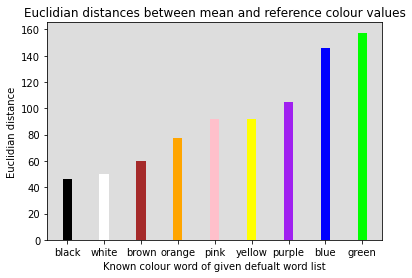

In [20]:
barwidth = 0.25
colour_vals = x11.loc[colour_names].values / 255
plt.bar(colour_names, dists, width = barwidth, color=colour_vals)
plt.xlabel('Known colour word of given defualt word list')
plt.ylabel('Euclidian distance')
plt.title('Euclidian distances between mean and reference colour values')
ax = plt.gca()
#sets the background colour to grey so that the white bar is visible
ax.set_facecolor('#dddddd') 
plt.show()

Bob then includes the following RGB image where the top-half is coloured using the reference X11 RGB triplet and the bottom-half is coloured using the averaged RGB triplet of Bob for each colour word. I have used the `.repeat` function in order to display this in a readable way on one figure.

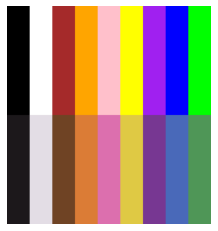

In [21]:
%matplotlib inline

width = 50
x11_colour_vals = [x11_dict[colour] for colour in colour_names]
# create empty image array
colours = np.zeros([480, len(colour_names) * width, 3], dtype=np.uint8)

# repeat each colour pixel 50 times and repeat 240 times vertically
colours[:240,:,:] = np.repeat(x11_colour_vals, width, axis=0)  # x11 dataset top half
colours[240:,:,:] = np.repeat(known_avgs.loc[colour_names].values, width, axis=0) # colour naming dataset bottom half
img = Image.fromarray(colours)

plt.imshow(img)
plt.axis('off');

Below, Bob includes the result of an automatic test in which the mean Euclidean
distance should be equal to 92 units for the given default list of words. This is done by parsing `mean` (which we have asigned below) and our expected result into the `checkDistance` function. 

In [22]:
mean = sum(known_euclidists.values()) / len(known_euclidists.values())

print(checkDistance(mean, 92))

('Expected value correct', 92)


Finally, Bob prints the unknown colour words in the given default list of words, or lets Alice know that there are no unknown colour words.

In [23]:
not_known_colours = [colour for colour in words if colour not in known_colours]

if not_known_colours:
    print(f'I do not the following {len(not_known_colours)} colour words: {not_known_colours}.')
else:
    print(f'There are no unknown colour words.')

I do not the following 2 colour words: ['lorem', 'ipsum'].


### Hidden Data:

In the following cell, Bob computes the intersection (the colours terms which are in both datasets) of the colours in the X11 dataset and the colours in the colour naming dataset.

Then using this Bob calculates the Euclidean Distance for all colours in the intersection and the time it takes to compute this.

In [24]:
start = time.perf_counter_ns()

# creates a set in order to avoid duplicates
intersection_colours = {colour for colour in data.colour_name if colour in x11_dict}
avg_colour_df = compute_avgs(data, intersection_colours)
# creates a dictionary of colour in intersection : euclidean distance
intersect_euclidists = {index: euclidist3D(row.values, x11_dict[index]) for index, row in avg_colour_df.iterrows() if index in x11_dict}

end = time.perf_counter_ns()
time_perf = end - start
for key, val in intersect_euclidists.items():
    print(f"{key}:\t{val:.2f}")
    
print(f'\nThe datasets have {len(intersection_colours)} colour terms in common.')

print(f'\nTime required to compute Euclidean distances: {time_perf_f:,} nanoseconds.')

aquamarine:	46.37
azure:	167.21
beige:	123.80
bisque:	161.60
black:	46.34
blue:	145.99
blueviolet:	81.11
brown:	59.63
chartreuse:	95.35
chocolate:	130.10
coral:	44.70
cornflowerblue:	47.21
cyan:	110.94
darkgreen:	67.64
darkgrey:	175.89
darkkhaki:	167.00
darkolivegreen:	52.50
darkorange:	100.90
darksalmon:	80.01
darkturquoise:	121.20
darkviolet:	172.04
deeppink:	61.43
forestgreen:	58.29
gold:	108.34
green:	157.55
greenyellow:	58.45
hotpink:	69.05
khaki:	182.05
lavender:	152.38
lemonchiffon:	70.48
lightblue:	81.99
lightcyan:	119.29
lightgrey:	43.86
lightpink:	35.20
lightsalmon:	31.13
lightskyblue:	33.58
lightyellow:	120.00
limegreen:	97.67
magenta:	139.40
maroon:	90.76
mediumblue:	129.87
mediumpurple:	117.43
midnightblue:	40.95
navy:	68.32
orange:	77.09
orangered:	64.68
orchid:	113.30
palegreen:	66.85
paleturquoise:	48.40
pink:	91.61
plum:	193.70
powderblue:	59.19
purple:	104.71
red:	96.26
royalblue:	92.33
saddlebrown:	32.02
salmon:	25.44
seagreen:	79.05
sienna:	33.62
skyblue:	44.61
spri

Next, Bob visualises this as a bar plot. The first cell sorts the dictionary of distances in preperation for this, and the second uses `matplotlib` to visualise the data.

We can see that average RGB value for 'salmon' is most similar to the X11 value for 'salmon', whilst, the average RGB value for 'plum' is the least similar.

In [25]:
intersect_euclidists_sorted = sorted(intersect_euclidists.items(), key=lambda tup: tup[1])
colours_intersect = [colour for colour, _ in intersect_euclidists_sorted]
dists_intersect = [dist for _, dist in intersect_euclidists_sorted]

C:\Users\Isobel\AppData\Local\Temp/ipykernel_14312/999401056.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=colours_intersect,rotation=90);


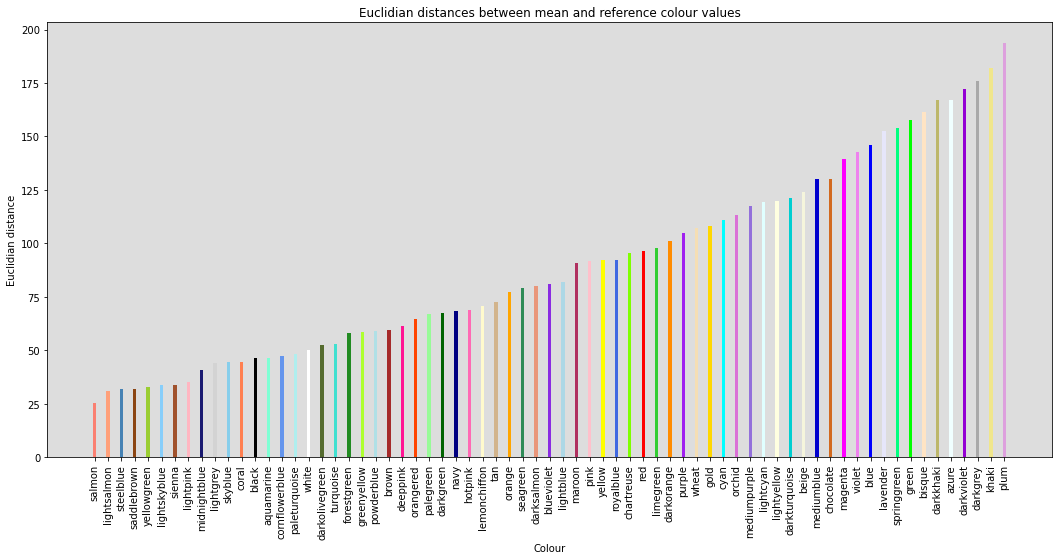

In [26]:
barwidth = 0.25
colour_vals2 = x11.loc[colours_intersect].values / 255
plt.figure(figsize=(18, 8))
plt.bar(colours_intersect, dists_intersect, width = barwidth, color=colour_vals2)
plt.xlabel('Colour')
plt.ylabel('Euclidian distance')
plt.title('Euclidian distances between mean and reference colour values')
ax = plt.gca()
ax.set_facecolor('#dddddd')
ax.set_xticklabels(labels=colours_intersect,rotation=90);
plt.show()

The following cells of code extract the frequency summary statistics for all colour terms in the colour naming dataset and visualise their frequency in a bar plot.

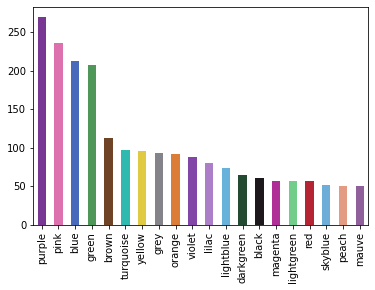

In [27]:
colour_freqs = data.colour_name.value_counts()

# Displays top 20 most frequent colours in the dataset
num_colours = 20
avg_colour_df = compute_avgs(data, colour_freqs[0:num_colours].index)
# We get the colour values from avg_colour_df in this case since these colours are not necessarily in the X11 dataset.
colour_freqs[0:num_colours].plot.bar(color=avg_colour_df.loc[colour_freqs[0:num_colours].index].values / 255);

Next, Bob checks how frequent in the colour naming dataset the colours in the intersection are. Then, it plots this on a graph against the Euclidean distance to see if there is any correlation between the two. On inspection, it appears that there is little correlation.

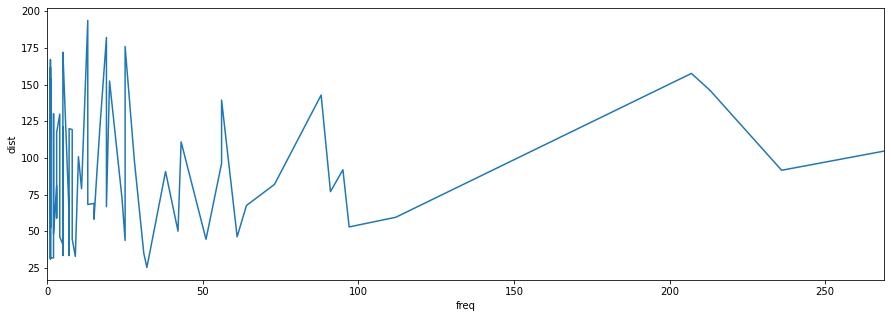

In [28]:
intersection_count = colour_freqs[colour_freqs.index.isin(set(x11.index))]
intersection_dists = [intersect_euclidists[colour] for colour in intersection_count.index]

plt.figure(figsize=(15, 5))
plt.plot(intersection_count, intersection_dists)
plt.xlabel("freq")
plt.ylabel("dist");
plt.xlim(0, colour_freqs.iloc[0]);

# Conclusion: ethical implications

The Colour Naming Game is supposedly being developed to help foreign language speakers learn colour names in English. Throughout this Python notebook we have tested the application, but, in order to fully evaluate whether the game achieves its aim, data on how fast players improve, if at all, is required. 

The integrity of the study could thereby be improved if we had another dataframe which corresponds to the `colour_naming_data` dataset in which the players guess is recorded next to the correct colour, thereby enabling us to count how often players guess incorrectly. Moreover, it would be useful to see whether players improve over time. 

However, ethical implications could arise as we are using the X11 values to verify the correctness of the players’ chosen RGB value. This is because the shortest Euclidean Distance between the two is not necessarily better than a longer distance, since in practice there is no one RGB triplet per colour. Therefore, the game could be evaluating people incorrectly, stunting their learning.

#### Word count:

In [29]:
filepath = 'Programming with Data AE2.ipynb'
with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')
# Markdown counter
md_counter = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        md_counter += len(cell['source'].strip().split())
print(f'Words in MarkDown: {md_counter}')
# Headings counter
head_counter = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "heading":
        head_counter += len(cell['source'].replace('#', '').strip().split())
print(f'Words in Headings: {head_counter}')
# Code counter
code_counter = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "code":
        code_counter += len(cell['input'].replace('#', '').strip().split())
print(f'Words in Code: {code_counter}')
# Total words
total_counter = code_counter + head_counter + md_counter
print(f'Total Words: {total_counter}')
print('Maximum Words Allowed: 2500 +-10%')

Words in MarkDown: 1725
Words in Headings: 22
Words in Code: 975
Total Words: 2722
Maximum Words Allowed: 2500 +-10%
